### SIFT (Scale-Invariant Feature Transform)

SIFT is a robust computer vision algorithm used to detect and describe local features in images. It identifies keypoints in the image that are invariant to scale, rotation, and illumination, making it ideal for matching and object recognition tasks.

#### Parameters

When using cv.SIFT_create(), you can customize the SIFT detector with several parameters (defaults are shown):

- nfeatures: Maximum number of features to retain.
- nOctaveLayers: Number of layers in each octave.
- contrastThreshold: Threshold to filter out weak features in low-contrast regions.
- edgeThreshold: Threshold to filter out keypoints near edges.
- sigma: Gaussian smoothing applied to the image at the first octave.

#### Returns

Calling sift.detectAndCompute(image, None) returns:

- keypoints: A list of cv2.KeyPoint objects, each representing a distinctive region in the image.

- descriptors: A NumPy array of shape (N, 128) where N is the number of keypoints. Each row is a 128-dimensional vector describing the region around a keypoint.

#### Advantages of SIFT

- Scale and Rotation Invariance: Detects features regardless of image size or orientation.

- Robust to Illumination Changes: Handles lighting variations effectively.

- Highly Distinctive: Keypoints are stable and discriminative.

- Good Matching Performance: Works well in real-time feature matching and recognition.

#### For futher information follow the link below:

[What is SIFT(Scale Invariant Feature Transform) Algorithm?](https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/)

Number of keypoints detected: 796
Descriptor shape: (796, 128)


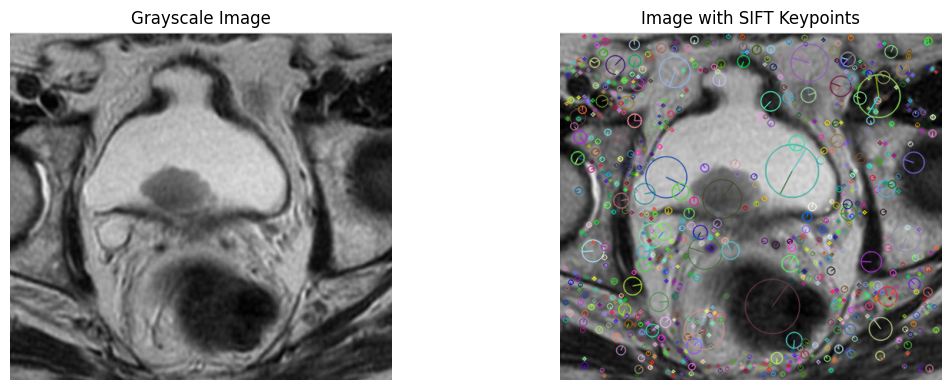

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read and preprocess the image
image_path = 'cancer.jpg'
original_image = cv.imread(image_path)

if original_image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Convert the image to grayscale
gray_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)

# Step 2: Extract SIFT features
sift = cv.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

print(f"Number of keypoints detected: {len(keypoints)}")
print(f"Descriptor shape: {descriptors.shape}")  # [number of keypoints, descriptor length]

# Step 3: Draw keypoints on the image
keypoint_image = cv.drawKeypoints(
    gray_image,
    keypoints,
    original_image.copy(),
    flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Step 4: Visualize original and keypoint images
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
# Convert BGR to RGB for correct display in matplotlib
plt.imshow(cv.cvtColor(keypoint_image, cv.COLOR_BGR2RGB))
plt.title('Image with SIFT Keypoints')
plt.axis('off')

plt.tight_layout()
plt.show()
